In [2]:
%load_ext autoreload
%autoreload 2

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
from ipywidgets import interact, IntSlider
from tqdm import tqdm

import matplotlib as mpl

import planet_methods as pm

import sys
import planetmovie as pmovie

Updated module 2025-04-21 23:20:18.276909


In [57]:
plt.rcParams.update({'axes.linewidth' : 1,
                     'ytick.major.width' : 1,
                     'ytick.minor.width' : 1,
                     'xtick.major.width' : 1,
                     'xtick.minor.width' : 1,
                     'xtick.labelsize': 10, 
                     'ytick.labelsize': 10,
                     'axes.labelsize': 12,
                     'font.family': 'Serif',
                      'figure.figsize': (6.4, 4.8),
                      # 'figure.figsize': (4, 3.8),
                      'xtick.direction': 'in',
                      'ytick.direction': 'in'
                    })

In [5]:
rj = 0.102763  # rsun
mj = 0.000954588  # msun

In [6]:
planet1 = pm.model('./LOGS_10mj_5rj_mdot0')

Creating model from directory ./LOGS_10mj_5rj_mdot0
Loading Profiles: 


100%|██████████| 92/92 [00:03<00:00, 24.01it/s]


In [7]:
p2 = pm.model('./LOGS_1mj_5rj_mdot_1e-8mj_per_year')

Creating model from directory ./LOGS_1mj_5rj_mdot_1e-8mj_per_year
Loading Profiles: 


100%|██████████| 14/14 [00:00<00:00, 22.19it/s]


In [8]:
p3 = pm.model('./LOGS_1mj_5rj_mdot_1e-7mj_per_year')

Creating model from directory ./LOGS_1mj_5rj_mdot_1e-7mj_per_year
Loading Profiles: 


100%|██████████| 21/21 [00:00<00:00, 21.44it/s]


In [9]:
p4 = pm.model('./LOGS_1mj_5rj_mdot_1e-9mj_per_year')

Creating model from directory ./LOGS_1mj_5rj_mdot_1e-9mj_per_year
Loading Profiles: 


100%|██████████| 10/10 [00:00<00:00, 23.46it/s]


In [111]:
p45 = pm.model('./LOGS_1mj_5rj_mdot_5e-9mj_per_year')

Creating model from directory ./LOGS_1mj_5rj_mdot_5e-9mj_per_year
Loading Profiles: 


100%|██████████| 7/7 [00:00<00:00, 99.61it/s]


In [78]:
p35 = pm.model('./LOGS_1mj_5rj_mdot_5e-7mj_per_year')

Creating model from directory ./LOGS_1mj_5rj_mdot_5e-7mj_per_year
Loading Profiles: 


100%|██████████| 16/16 [00:00<00:00, 94.47it/s]


In [10]:
m10mdot8 = pm.model('./LOGS_10mj_5rj_mdot_1e-8mj_per_year')

Creating model from directory ./LOGS_10mj_5rj_mdot_1e-8mj_per_year
Loading Profiles: 


100%|██████████| 100/100 [00:03<00:00, 25.25it/s]


In [117]:
m10mdot7 = pm.model('./LOGS_10mj_5rj_mdot_1e-7mj_per_year')

Creating model from directory ./LOGS_10mj_5rj_mdot_1e-7mj_per_year
Loading Profiles: 


100%|██████████| 100/100 [00:01<00:00, 76.03it/s]


In [120]:
m10mdot9 = pm.model('./LOGS_10mj_5rj_mdot_1e-9mj_per_year')

Creating model from directory ./LOGS_10mj_5rj_mdot_1e-9mj_per_year
Loading Profiles: 


100%|██████████| 100/100 [00:00<00:00, 113.00it/s]


In [72]:
colors = ['#335c67', '#fff3b0', '#e09f3e', '#9e2a2b', '#540b0e']
colors2 = ['#001219', '#005F73', '#0A9396', '#94D2BD', '#E9D8A6', '#EE9B00', '#CA6702', '#BB3E03', '#AE2012', '#9B2226']
colors3 = ['#ef476f', '#ffd166', '#06d6a0', '#118ab2', '#073b4c']

Text(0, 0.5, '$T_\\mathrm{eff}$ (K)')

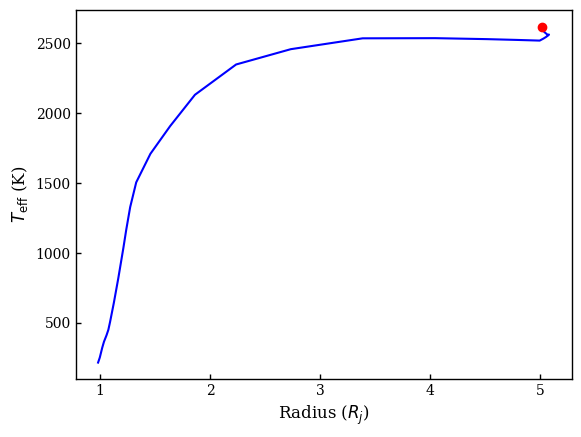

In [11]:
plt.plot(10**planet1.DF['log_R'] / rj, 10**planet1.DF['log_Teff'], color='blue')
plt.scatter(10**planet1.DF['log_R'].iloc[0] / rj, 10**planet1.DF['log_Teff'].iloc[0], color='red', zorder=10)
plt.xlabel(r'Radius ($R_j$)')
plt.ylabel(r'$T_\mathrm{eff}$ (K)')

# Teff vs Age

Difference in final temperatures, but the tracks are hard to see because they all live different ages (because they accrete up to final mass faster or slower)

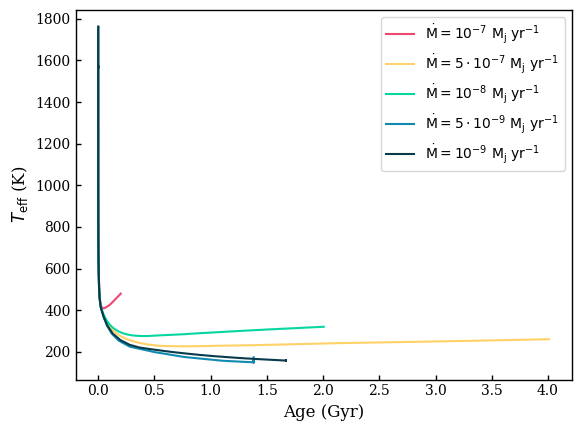

In [134]:
plt.plot(10**-9 * p3.DF['star_age'], 10**p3.DF['log_Teff'], color=colors3[0], label=r'$\dot{\mathrm{M}} = 10^{-7} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(10**-9 * p35.DF['star_age'], 10**p35.DF['log_Teff'], color=colors3[1], label=r'$\dot{\mathrm{M}} = 5 \cdot 10^{-7} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(10**-9 * p2.DF['star_age'], 10**p2.DF['log_Teff'], color=colors3[2], label=r'$\dot{\mathrm{M}} = 10^{-8} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(10**-9 * p45.DF['star_age'], 10**p45.DF['log_Teff'], color=colors3[3], label=r'$\dot{\mathrm{M}} = 5 \cdot 10^{-9} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(10**-9 * p4.DF['star_age'], 10**p4.DF['log_Teff'], color=colors3[4], label=r'$\dot{\mathrm{M}} = 10^{-9} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')

plt.xlabel('Age (Gyr)')
plt.ylabel(r'$T_\mathrm{eff}$ (K)')
plt.legend()

# Teff vs Mass

Big difference between the higher accretion rate tracks and the lowest ones

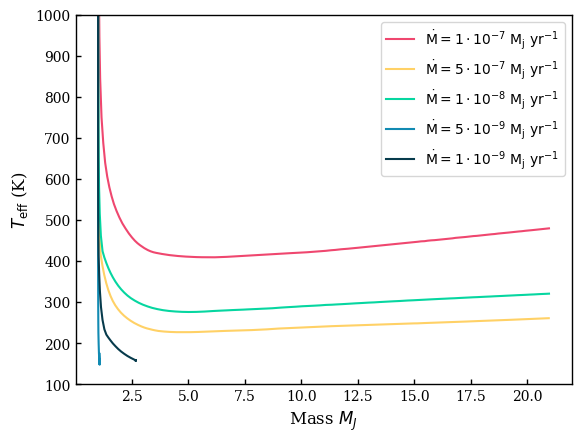

In [113]:
plt.plot(p3.DF['star_mass']/mj, 10**p3.DF['log_Teff'], color=colors3[0], label=r'$\dot{\mathrm{M}} = 1 \cdot 10^{-7} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(p35.DF['star_mass']/mj, 10**p35.DF['log_Teff'], color=colors3[1], label=r'$\dot{\mathrm{M}} = 5 \cdot 10^{-7} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(p2.DF['star_mass']/mj, 10**p2.DF['log_Teff'], color=colors3[2], label=r'$\dot{\mathrm{M}} = 1 \cdot 10^{-8} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(p45.DF['star_mass']/mj, 10**p45.DF['log_Teff'], color=colors3[3], label=r'$\dot{\mathrm{M}} = 5 \cdot 10^{-9} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(p4.DF['star_mass']/mj, 10**p4.DF['log_Teff'], color=colors3[4], label=r'$\dot{\mathrm{M}} = 1 \cdot 10^{-9} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')


plt.xlabel(r'Mass $M_J$')
plt.ylabel(r'$T_\mathrm{eff}$ (K)')
plt.ylim(100, 1000)
plt.legend()

# Teff vs Mass (Higher Initial Mass)

An even bigger differennce ! Also interestingly, while all the tracks for the lower initial mass seemed to drop sharply and then plateau, the tracks here (especially the higher rate) curves much more slowly. Spending more time at a higher temperature could affect the internal structure of the planet

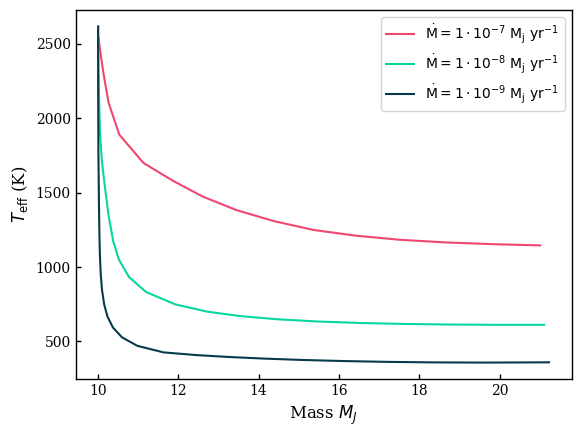

In [122]:
# plt.plot(p35.DF['star_mass']/mj, 10**p35.DF['log_Teff'], color=colors3[1], label=r'$\dot{\mathrm{M}} = 5 \cdot 10^{-7} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(m10mdot7.DF['star_mass']/mj, 10**m10mdot7.DF['log_Teff'], color=colors3[0], label=r'$\dot{\mathrm{M}} = 1 \cdot 10^{-7} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(m10mdot8.DF['star_mass']/mj, 10**m10mdot8.DF['log_Teff'], color=colors3[2], label=r'$\dot{\mathrm{M}} = 1 \cdot 10^{-8} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
# plt.plot(p45.DF['star_mass']/mj, 10**p45.DF['log_Teff'], color=colors3[3], label=r'$\dot{\mathrm{M}} = 5 \cdot 10^{-9} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
# plt.plot(p4.DF['star_mass']/mj, 10**p4.DF['log_Teff'], color=colors3[4], label=r'$\dot{\mathrm{M}} = 1 \cdot 10^{-9} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(m10mdot9.DF['star_mass']/mj, 10**m10mdot9.DF['log_Teff'], color=colors3[4], label=r'$\dot{\mathrm{M}} = 1 \cdot 10^{-9} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')



plt.xlabel(r'Mass $M_J$')
plt.ylabel(r'$T_\mathrm{eff}$ (K)')
# plt.ylim(100, 1000)
plt.legend()

# Radius vs Mass

Here I think it's clear that the lower accretion rate tracks probably broke because they try to go below 1 Rj, which the MESA instrument paper states it's not well equipped to handle.

(0.8, 2.0)

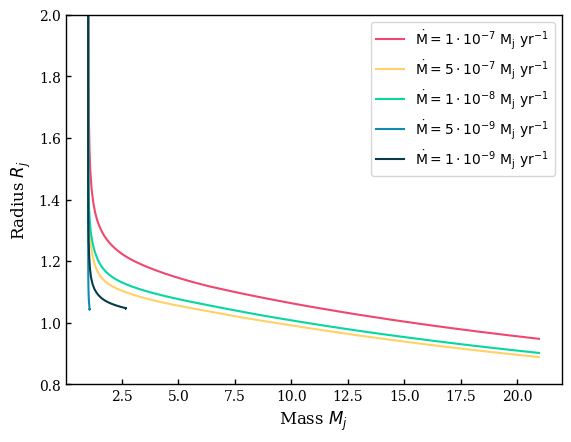

In [116]:
plt.plot(p3.DF['star_mass'] /mj, 10**p3.DF['log_R'] / rj, color=colors3[0], label=r'$\dot{\mathrm{M}} = 1 \cdot 10^{-7} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(p35.DF['star_mass'] /mj, 10**p35.DF['log_R'] / rj, color=colors3[1], label=r'$\dot{\mathrm{M}} = 5 \cdot 10^{-7} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(p2.DF['star_mass'] /mj, 10**p2.DF['log_R'] / rj, color=colors3[2], label=r'$\dot{\mathrm{M}} = 1 \cdot 10^{-8} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(p45.DF['star_mass'] /mj, 10**p45.DF['log_R'] / rj, color=colors3[3],  label=r'$\dot{\mathrm{M}} = 5 \cdot 10^{-9} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(p4.DF['star_mass'] /mj, 10**p4.DF['log_R'] / rj, color=colors3[4],  label=r'$\dot{\mathrm{M}} = 1 \cdot 10^{-9} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')

# plt.plot(m10mdot8.DF['star_mass'] /mj, 10**m10mdot8.DF['log_R'] / rj, label=r'$M = 10 M_j; \dot{\mathrm{M}} = 10^{-8} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')


# plt.scatter(p2.DF['star_mass'].iloc[0] / mj, 10**p2.DF['log_R'].iloc[0] / rj, color='black', zorder=10, label='Initial')

plt.xlabel(r'Mass $M_j$')
plt.ylabel(r'Radius $R_j$')
plt.legend()
# plt.yscale('log')
plt.ylim(0.8, 2)

# Radius vs Mass (Higher Initial Mass)

Same as for the effective temperature, the difference between the tracks here is higher. That's interesting to me because for a higher initial mass but the same final mass, the % change in mass per time step should be less, so why is the difference greater?

(0.8, 2.0)

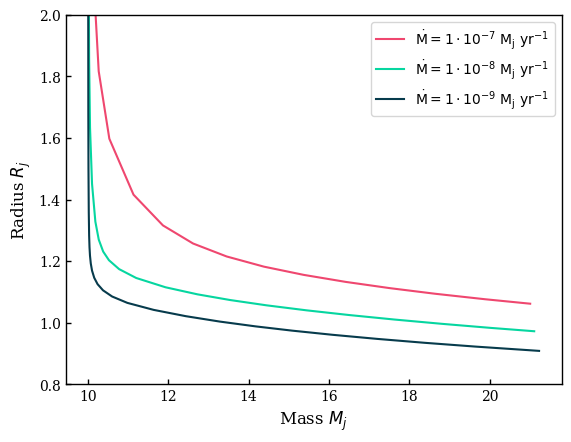

In [132]:
# plt.plot(p3.DF['star_mass'] /mj, 10**p3.DF['log_R'] / rj, color=colors3[0], label=r'$\dot{\mathrm{M}} = 1 \cdot 10^{-7} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
# plt.plot(p35.DF['star_mass'] /mj, 10**p35.DF['log_R'] / rj, color=colors3[1], label=r'$\dot{\mathrm{M}} = 5 \cdot 10^{-7} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
# plt.plot(p2.DF['star_mass'] /mj, 10**p2.DF['log_R'] / rj, color=colors3[2], label=r'$\dot{\mathrm{M}} = 1 \cdot 10^{-8} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
# plt.plot(p45.DF['star_mass'] /mj, 10**p45.DF['log_R'] / rj, color=colors3[3],  label=r'$\dot{\mathrm{M}} = 5 \cdot 10^{-9} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
# plt.plot(p4.DF['star_mass'] /mj, 10**p4.DF['log_R'] / rj, color=colors3[4],  label=r'$\dot{\mathrm{M}} = 1 \cdot 10^{-9} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')

plt.plot(m10mdot7.DF['star_mass'] /mj, 10**m10mdot7.DF['log_R'] / rj, color=colors3[0], label=r'$\dot{\mathrm{M}} = 1 \cdot  10^{-7} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(m10mdot8.DF['star_mass'] /mj, 10**m10mdot8.DF['log_R'] / rj, color=colors3[2], label=r'$\dot{\mathrm{M}} = 1 \cdot  10^{-8} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(m10mdot9.DF['star_mass'] /mj, 10**m10mdot9.DF['log_R'] / rj, color=colors3[4], label=r'$\dot{\mathrm{M}} = 1 \cdot  10^{-9} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')


# plt.scatter(p2.DF['star_mass'].iloc[0] / mj, 10**p2.DF['log_R'].iloc[0] / rj, color='black', zorder=10, label='Initial')

plt.xlabel(r'Mass $M_j$')
plt.ylabel(r'Radius $R_j$')
plt.legend()
# plt.yscale('log')
plt.ylim(0.8, 2)

# Abundance

The total abundance doesn't change even though total_mass_he4 (and h1 and others) does because it adds mass uniformly. For an extension of this project, it could be interesting to evolve planets that accrete mass at non uniform chemical distributions.

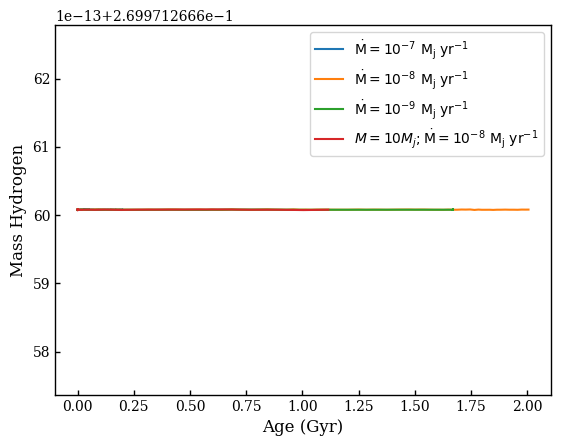

In [51]:
plt.plot(10**-9 * p3.DF['star_age'], p3.DF['total_mass_he4']/p3.DF['star_mass'], label=r'$\dot{\mathrm{M}} = 10^{-7} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(10**-9 * p2.DF['star_age'], p2.DF['total_mass_he4']/p2.DF['star_mass'], label=r'$\dot{\mathrm{M}} = 10^{-8} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(10**-9 * p4.DF['star_age'], p4.DF['total_mass_he4']/p4.DF['star_mass'], label=r'$\dot{\mathrm{M}} = 10^{-9} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')

plt.plot(10**-9*m10mdot8.DF['star_age'], m10mdot8.DF['total_mass_he4'] /m10mdot8.DF['star_mass'], label=r'$M = 10 M_j; \dot{\mathrm{M}} = 10^{-8} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')


plt.xlabel('Age (Gyr)')
plt.ylabel(r'Mass Hydrogen')
# plt.yscale('log')
plt.legend()

# Luminosity vs Mass

The flux_planet/flux_star ratio for direct imaging to be possible for, e.g., a Jupiter-Sun system is 10^-9. Here, if we assume the host is a sun-like star with close to solar luminosity, the ratio is high enough for direct imaging (assuming a wide enough angular separation).

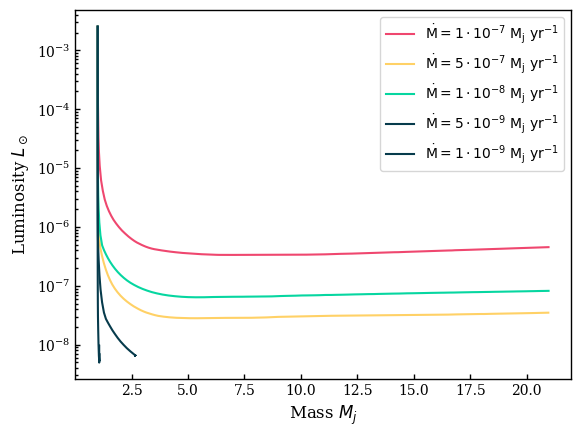

In [115]:
plt.plot(p3.DF['star_mass']/mj, 10**p3.DF['log_L'], color=colors3[0], label=r'$\dot{\mathrm{M}} = 1 \cdot 10^{-7} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(p35.DF['star_mass']/mj, 10**p35.DF['log_L'], color=colors3[1], label=r'$\dot{\mathrm{M}} = 5 \cdot 10^{-7} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(p2.DF['star_mass']/mj, 10**p2.DF['log_L'], color=colors3[2], label=r'$\dot{\mathrm{M}} = 1 \cdot 10^{-8} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(p45.DF['star_mass']/mj, 10**p45.DF['log_L'], color=colors3[4], label=r'$\dot{\mathrm{M}} =5 \cdot  10^{-9} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(p4.DF['star_mass']/mj, 10**p4.DF['log_L'], color=colors3[4], label=r'$\dot{\mathrm{M}} =1 \cdot  10^{-9} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')

# plt.plot(10**-9*m10mdot8.DF['star_age'], 10**m10mdot8.DF['log_L'], label=r'$M = 10 M_j; \dot{\mathrm{M}} = 10^{-8} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')


plt.xlabel(r'Mass $M_j$')
plt.ylabel(r'Luminosity $L_\odot$')
plt.yscale('log')
plt.legend()

# Luminosity vs Mass (higher Mass)

See above - possible for direct imaging; the differences in the tracks is greater here. 

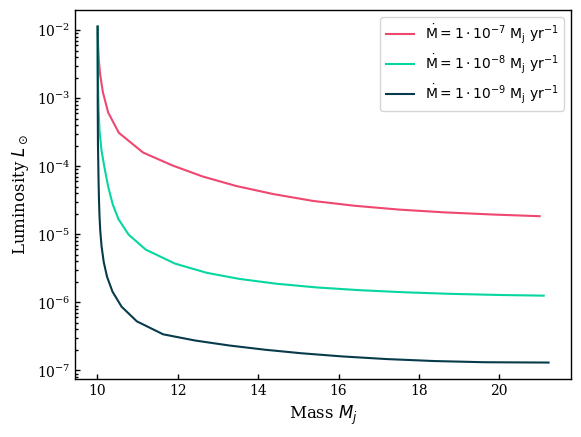

In [130]:
# plt.plot(p3.DF['star_mass']/mj, 10**p3.DF['log_L'], color=colors3[0], label=r'$\dot{\mathrm{M}} = 1 \cdot 10^{-7} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
# plt.plot(p35.DF['star_mass']/mj, 10**p35.DF['log_L'], color=colors3[1], label=r'$\dot{\mathrm{M}} = 5 \cdot 10^{-7} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
# plt.plot(p2.DF['star_mass']/mj, 10**p2.DF['log_L'], color=colors3[2], label=r'$\dot{\mathrm{M}} = 1 \cdot 10^{-8} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
# plt.plot(p45.DF['star_mass']/mj, 10**p45.DF['log_L'], color=colors3[4], label=r'$\dot{\mathrm{M}} =5 \cdot  10^{-9} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
# plt.plot(p4.DF['star_mass']/mj, 10**p4.DF['log_L'], color=colors3[4], label=r'$\dot{\mathrm{M}} =1 \cdot  10^{-9} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')

plt.plot(m10mdot7.DF['star_mass']/mj, 10**m10mdot7.DF['log_L'], color=colors3[0], label=r'$\dot{\mathrm{M}} = 1 \cdot 10^{-7} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(m10mdot8.DF['star_mass']/mj, 10**m10mdot8.DF['log_L'], color=colors3[2],label=r'$\dot{\mathrm{M}} = 1 \cdot 10^{-8} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(m10mdot9.DF['star_mass']/mj, 10**m10mdot9.DF['log_L'], color=colors3[4], label=r'$\dot{\mathrm{M}} =1 \cdot  10^{-9} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')


plt.xlabel(r'Mass $M_j$')
plt.ylabel(r'Luminosity $L_\odot$')
plt.yscale('log')
plt.legend()

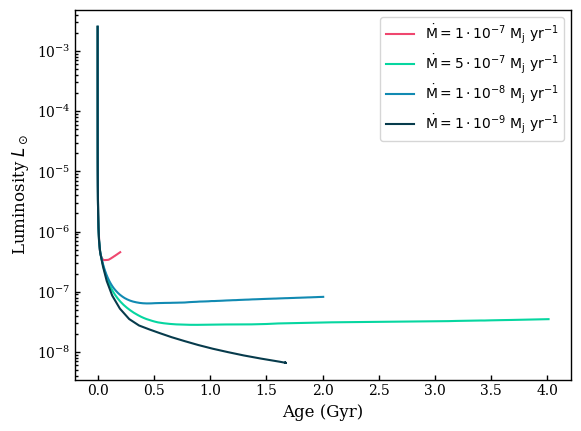

In [108]:
plt.plot(10**-9 * p3.DF['star_age'], 10**p3.DF['log_L'], color=colors3[0], label=r'$\dot{\mathrm{M}} = 1 \cdot 10^{-7} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(10**-9 * p35.DF['star_age'], 10**p35.DF['log_L'], color=colors3[2], label=r'$\dot{\mathrm{M}} = 5 \cdot 10^{-7} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(10**-9 * p2.DF['star_age'], 10**p2.DF['log_L'], color=colors3[3], label=r'$\dot{\mathrm{M}} = 1 \cdot 10^{-8} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')
plt.plot(10**-9 * p4.DF['star_age'], 10**p4.DF['log_L'], color=colors3[4], label=r'$\dot{\mathrm{M}} =1 \cdot  10^{-9} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')

# plt.plot(10**-9*m10mdot8.DF['star_age'], 10**m10mdot8.DF['log_L'], label=r'$M = 10 M_j; \dot{\mathrm{M}} = 10^{-8} \ \mathrm{M}_\mathrm{j} \ \mathrm{yr}^{-1}$')


plt.xlabel('Age (Gyr)')
plt.ylabel(r'Luminosity $L_\odot$')
plt.yscale('log')
plt.legend()

tried to make a little movie of the planet but I don't think there's any particularly interesting quantities in these models. The convection/radiation that I show in these is ok but in the future if I make the planets with different rates of accretion for the different chemicals (as I mentioned above), it could be interesting to have a movie with the chemical abundances over time

Updated module 2025-04-21 23:43:17.522869
creating folder of images: ./planet_images_1mj_1e-9


100%|██████████| 91/91 [00:06<00:00, 13.06it/s]


creating video planet_1mj_1e-9.avi
Images: ['img0.png', 'img1.png', 'img2.png', 'img3.png', 'img4.png', 'img5.png', 'img6.png', 'img7.png', 'img8.png', 'img9.png', 'img10.png', 'img11.png', 'img12.png', 'img13.png', 'img14.png', 'img15.png', 'img16.png', 'img17.png', 'img18.png', 'img19.png', 'img20.png', 'img21.png', 'img22.png', 'img23.png', 'img24.png', 'img25.png', 'img26.png', 'img27.png', 'img28.png', 'img29.png', 'img30.png', 'img31.png', 'img32.png', 'img33.png', 'img34.png', 'img35.png', 'img36.png', 'img37.png', 'img38.png', 'img39.png', 'img40.png', 'img41.png', 'img42.png', 'img43.png', 'img44.png', 'img45.png', 'img46.png', 'img47.png', 'img48.png', 'img49.png', 'img50.png', 'img51.png', 'img52.png', 'img53.png', 'img54.png', 'img55.png', 'img56.png', 'img57.png', 'img58.png', 'img59.png', 'img60.png', 'img61.png', 'img62.png', 'img63.png', 'img64.png', 'img65.png', 'img66.png', 'img67.png', 'img68.png', 'img69.png', 'img70.png', 'img71.png', 'img72.png', 'img73.png', 'img

100%|██████████| 91/91 [00:02<00:00, 32.02it/s]

Video planet_1mj_1e-9.avi generated successfully!


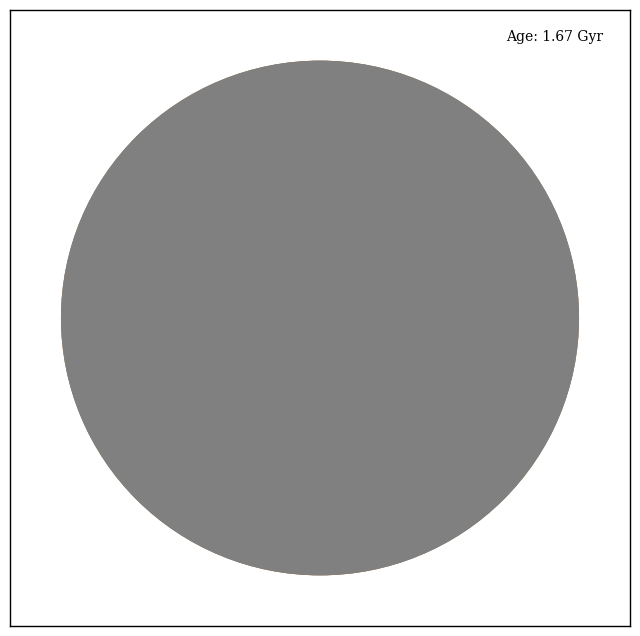

In [54]:
pmovie.movie('./LOGS_1mj_5rj_mdot_1e-9mj_per_year/history.data', image_folder_name='./planet_images_1mj_1e-9', video_name='planet_1mj_1e-9.avi', age_plot=True, fps=60)